<a href="https://colab.research.google.com/github/Aditya-y9/pSYcode/blob/Aditya/ActiveUserClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

In [5]:
df = pd.read_csv("/content/Instagram User Stats.csv")

In [6]:
df.head()

,id,pos,flr,flg,eg,er,fg,op
0,1,702,906,677,0.1891,6.070640,1.177860,14.8936
1,2,160,386,713,0.1950,6.260800,0.094127,16.9811
2,3,851,20400,3700,0.0664,0.717416,2.242440,38.2166
3,4,42,900,7500,0.0592,1.901230,7.643310,60.1626
4,5,50,486,4350,0.5112,16.409500,0.372900,61.9403


In [7]:
df.tail()

,id,pos,flr,flg,eg,er,fg,op
70404,70405,78,149,199,0.2497,8.01640,0.410959,45.0704
70405,70406,27,64,48,0.4511,14.47920,0.970664,10.3448
70406,70407,85,506,652,0.1201,3.85375,0.000000,43.1507
70407,70408,57,107,31,0.4222,13.55140,-1.675880,42.3729
70408,70409,53,208,336,0.2713,8.70726,0.590125,38.3562


In [8]:
df.sample(10)

,id,pos,flr,flg,eg,er,fg,op
6486,6487,1100,882,2400,0.0661,2.12270,0.231021,69.6000
20099,20100,1300,2000,2000,0.2079,6.67222,0.934288,39.1455
41373,41374,269,1300,4400,0.0731,2.34615,3.430530,45.6140
16884,16885,40,358,1100,0.3519,11.29730,7.868600,62.2093
316,317,14,392,363,0.8497,27.27630,0.574163,45.5331
21924,21925,953,1400,2100,0.1890,6.06746,1.054500,19.5286
7021,7022,34,7700,7500,0.4598,6.75974,0.487805,43.7182
54786,54787,632,696,684,0.0745,2.39182,0.727612,0.0000
7406,7407,895,1900,1200,0.0463,1.48684,3.308820,20.1923
58903,58904,3,139,231,0.4632,14.86810,-0.521218,78.2609


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70409 entries, 0 to 70408
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      70409 non-null  int64  
 1   pos     70409 non-null  int64  
 2   flr     70409 non-null  int64  
 3   flg     70409 non-null  int64  
 4   eg      70409 non-null  float64
 5   er      70409 non-null  float64
 6   fg      70409 non-null  float64
 7   op      70409 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 4.3 MB


In [10]:
df.isna().sum()

id     0
pos    0
flr    0
flg    0
eg     0
er     0
fg     0
op     0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df = df.drop(['id'], axis = 1)

In [13]:
df['Activity'] = [1 if i > 20 else 0 for i in df['er']]

In [14]:
df.head()

,pos,flr,flg,eg,er,fg,op,Activity
0,702,906,677,0.1891,6.070640,1.177860,14.8936,0
1,160,386,713,0.1950,6.260800,0.094127,16.9811,0
2,851,20400,3700,0.0664,0.717416,2.242440,38.2166,0
3,42,900,7500,0.0592,1.901230,7.643310,60.1626,0
4,50,486,4350,0.5112,16.409500,0.372900,61.9403,0


<Axes: >

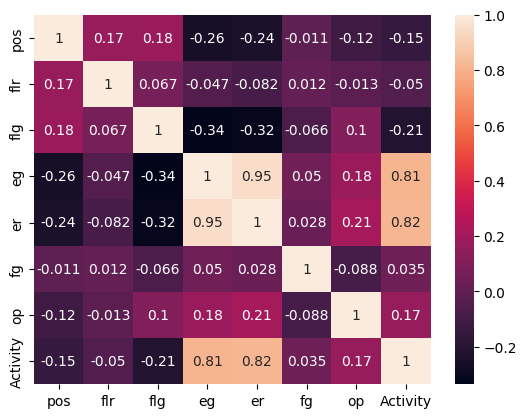

In [15]:
sns.heatmap(df.corr(), annot = True)

In [16]:
X = df.drop(['Activity',"er"], axis = 1)
y = df.Activity

In [17]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=2,test_size = 0.2)

(0.9984377219145008,
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7cf606451e70>)

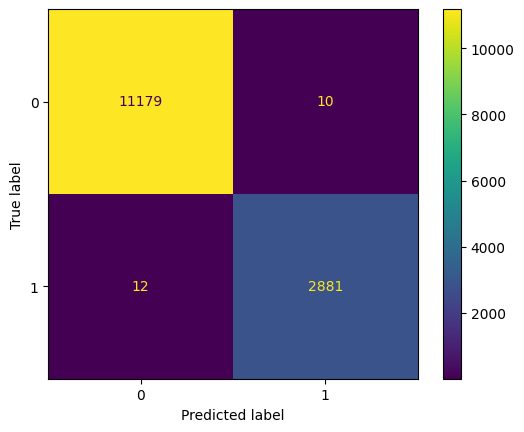

In [18]:
from sklearn.ensemble import RandomForestClassifier
rand = RandomForestClassifier(n_estimators=200,random_state=2)
rand.fit(x_train,y_train)
rand_pred = rand.predict(x_test)
accuracy_score(y_test, rand_pred), ConfusionMatrixDisplay(confusion_matrix(y_test, rand_pred)).plot()

In [20]:
from sklearn.metrics import classification_report
print(classification_report(rand_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11191
           1       1.00      1.00      1.00      2891

    accuracy                           1.00     14082
   macro avg       1.00      1.00      1.00     14082
weighted avg       1.00      1.00      1.00     14082

